In [1]:
import skimage.io as skio
import skimage.exposure as skex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[-3, -2, -1, 0, 1, 2]
-3,-3,-3


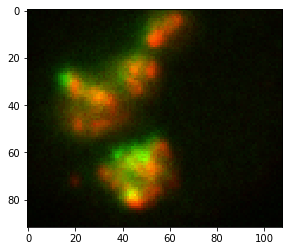

-3,-3,-2


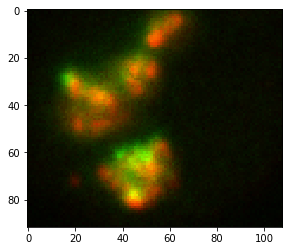

-3,-3,-1


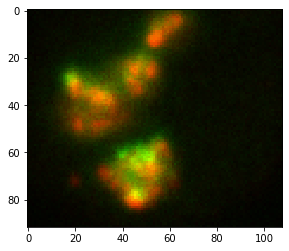

-3,-3,0


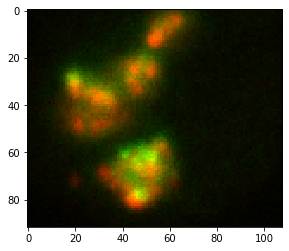

-3,-3,1


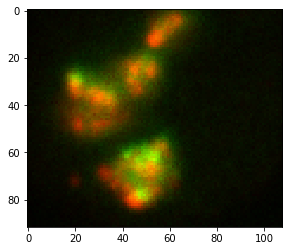

-3,-3,2


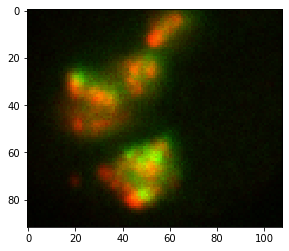

-3,-2,-3


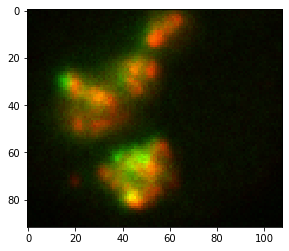

-3,-2,-2


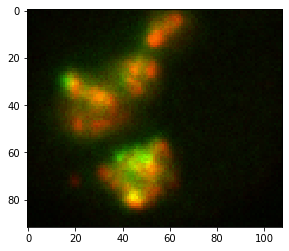

-3,-2,-1


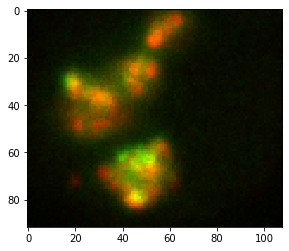

-3,-2,0


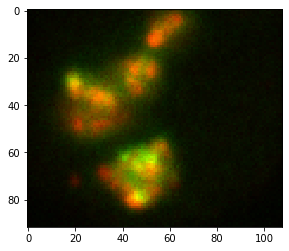

-3,-2,1


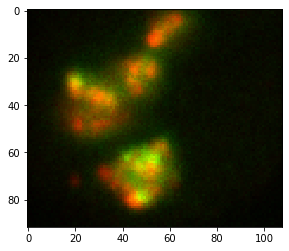

-3,-2,2


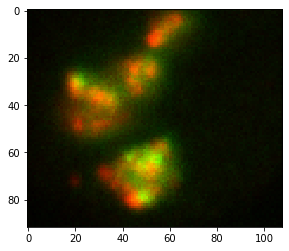

-3,-1,-3


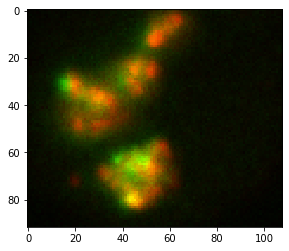

-3,-1,-2


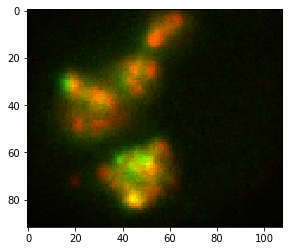

-3,-1,-1


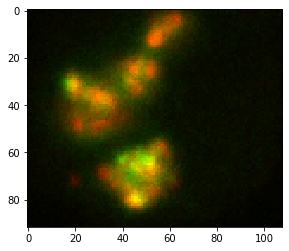

-3,-1,0


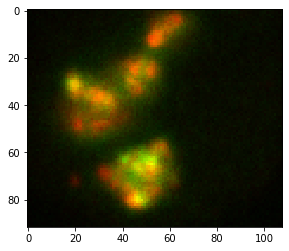

-3,-1,1


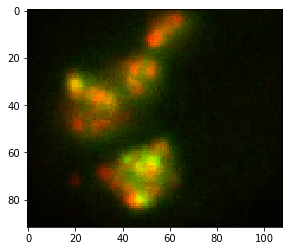

-3,-1,2


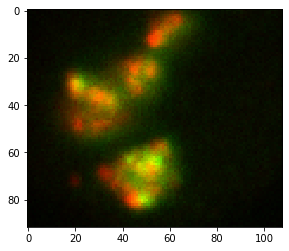

-3,0,-3


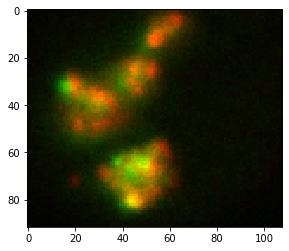

-3,0,-2


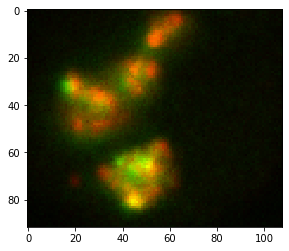

-3,0,-1


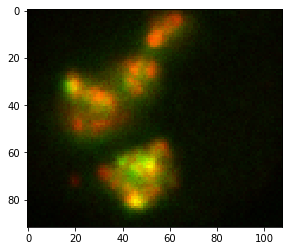

-3,0,0


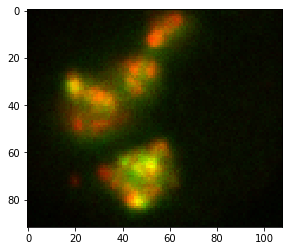

-3,0,1


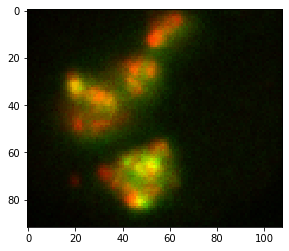

-3,0,2


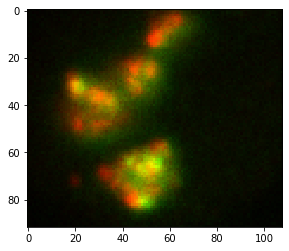

-3,1,-3


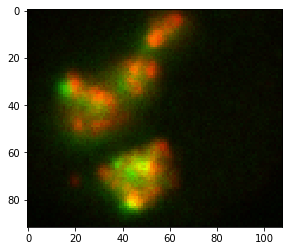

-3,1,-2


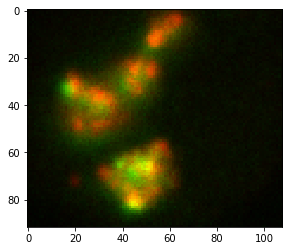

-3,1,-1


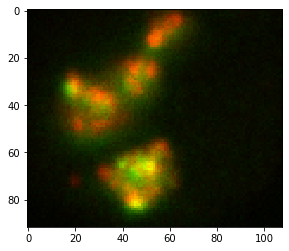

-3,1,0


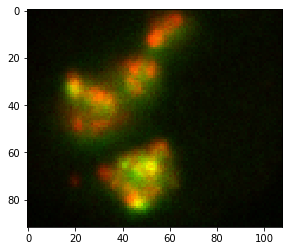

-3,1,1


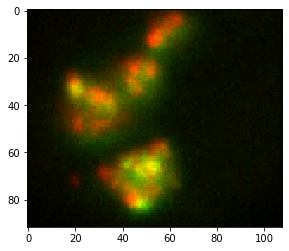

-3,1,2


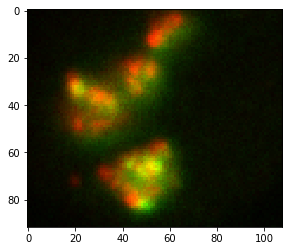

-3,2,-3


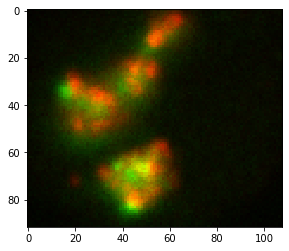

-3,2,-2


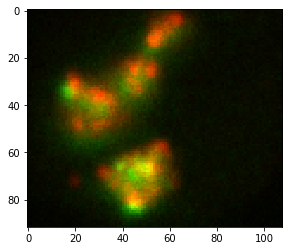

-3,2,-1


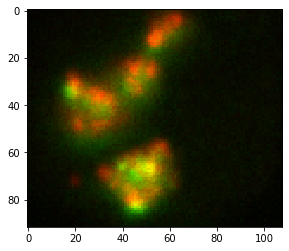

-3,2,0


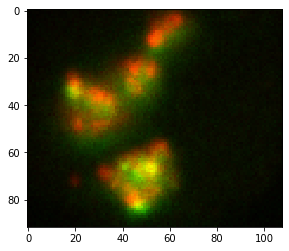

-3,2,1


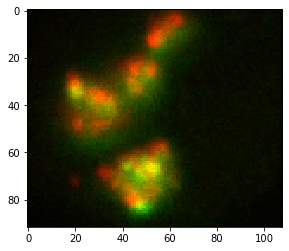

-3,2,2


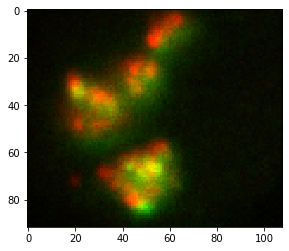

-2,-3,-3


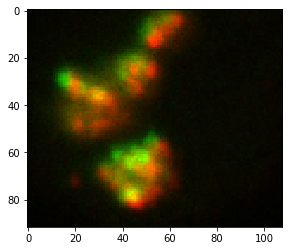

-2,-3,-2


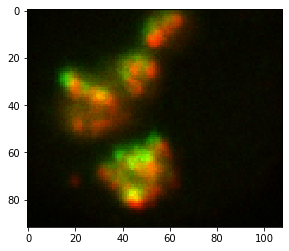

-2,-3,-1


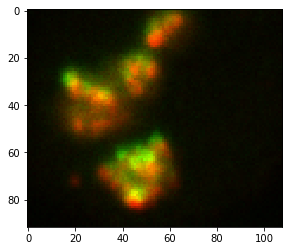

-2,-3,0


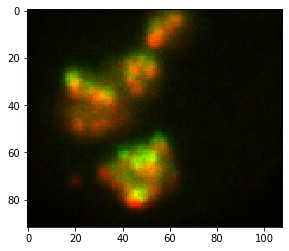

-2,-3,1


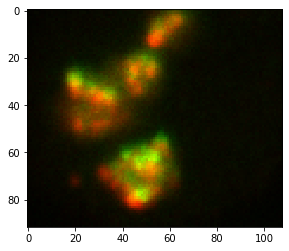

-2,-3,2


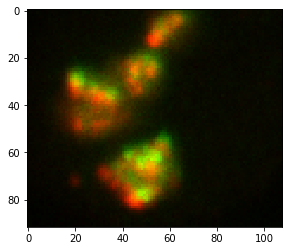

-2,-2,-3


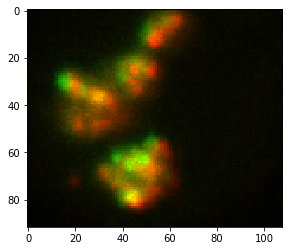

-2,-2,-2


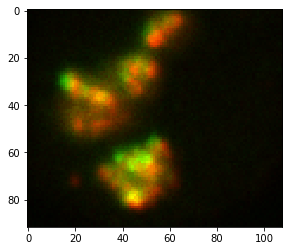

-2,-2,-1


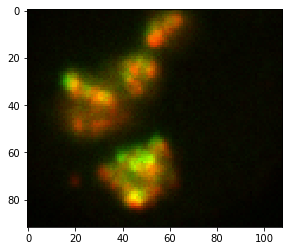

-2,-2,0


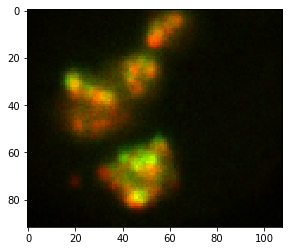

-2,-2,1


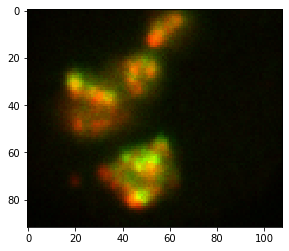

-2,-2,2


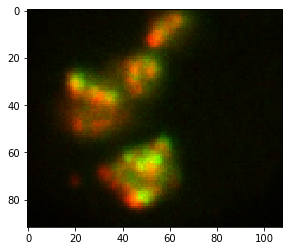

-2,-1,-3


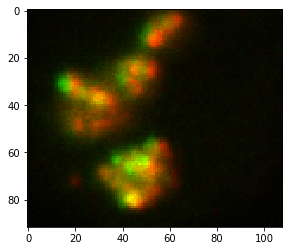

-2,-1,-2


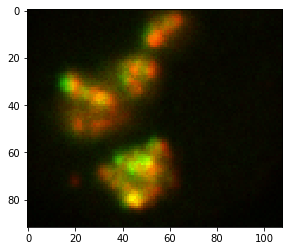

-2,-1,-1


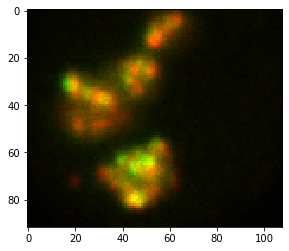

-2,-1,0


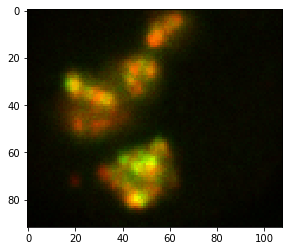

-2,-1,1


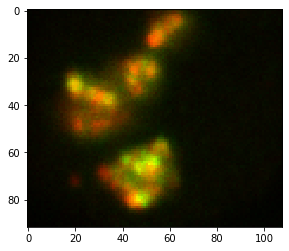

-2,-1,2


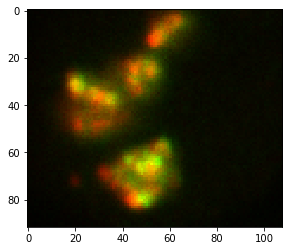

-2,0,-3


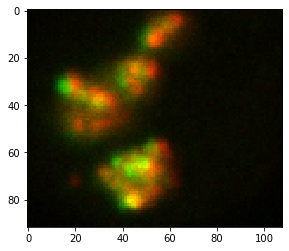

-2,0,-2


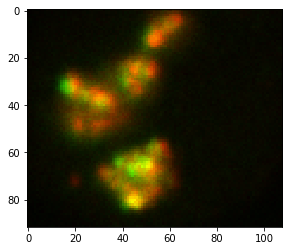

-2,0,-1


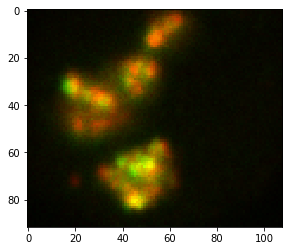

-2,0,0


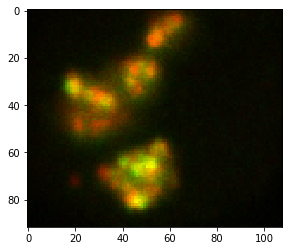

-2,0,1


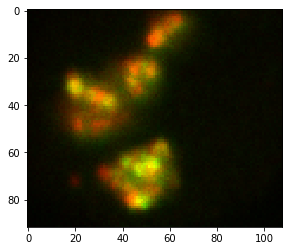

-2,0,2


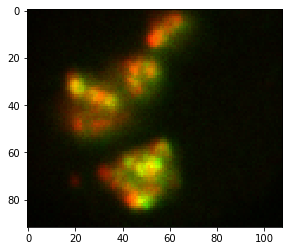

-2,1,-3


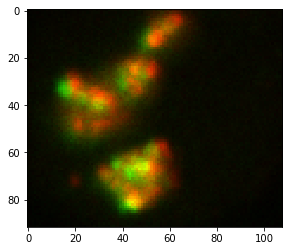

-2,1,-2


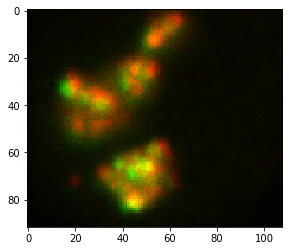

-2,1,-1


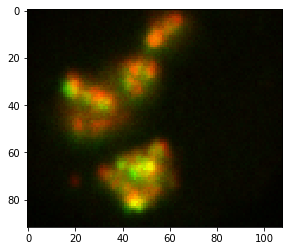

-2,1,0


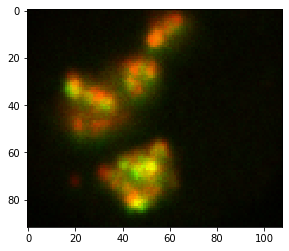

-2,1,1


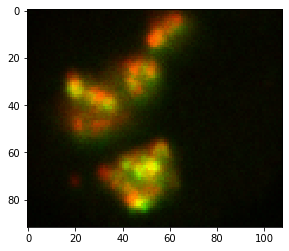

-2,1,2


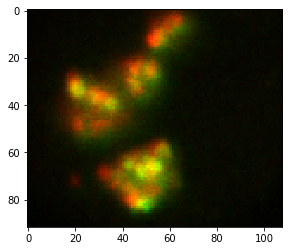

-2,2,-3


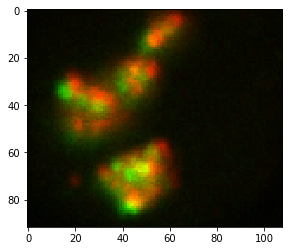

-2,2,-2


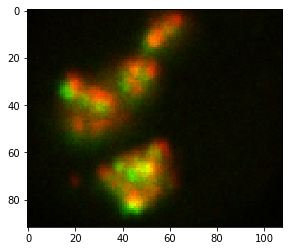

-2,2,-1


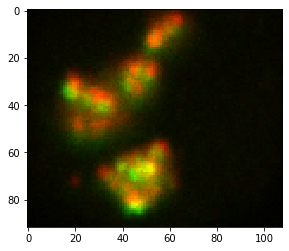

-2,2,0


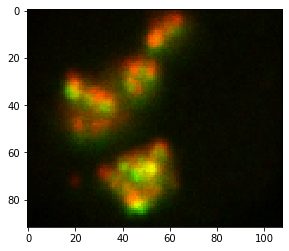

-2,2,1


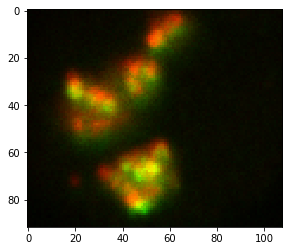

-2,2,2


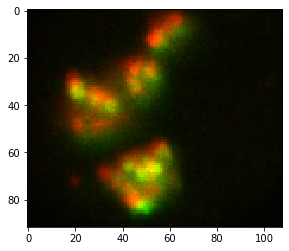

-1,-3,-3


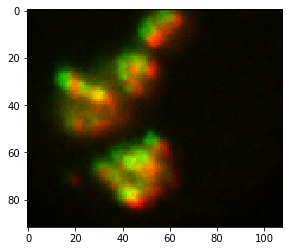

-1,-3,-2


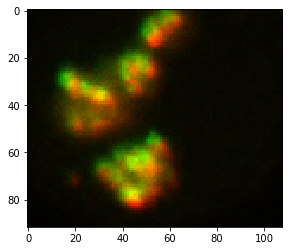

-1,-3,-1


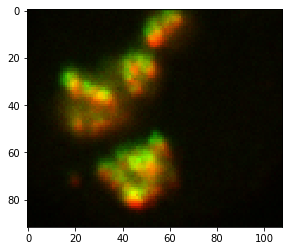

-1,-3,0


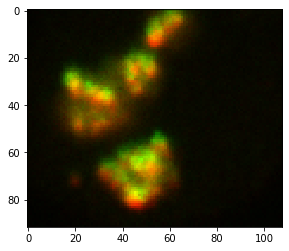

-1,-3,1


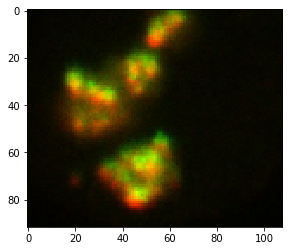

-1,-3,2


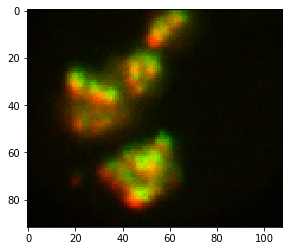

-1,-2,-3


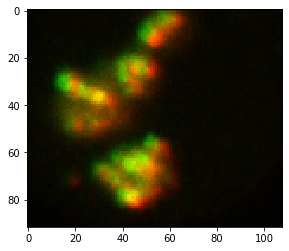

-1,-2,-2


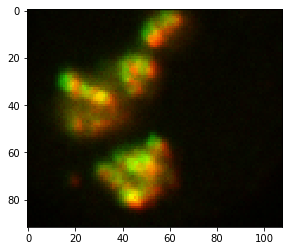

-1,-2,-1


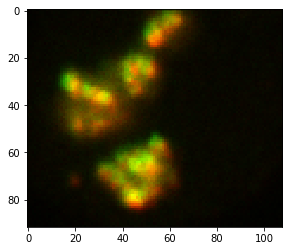

-1,-2,0


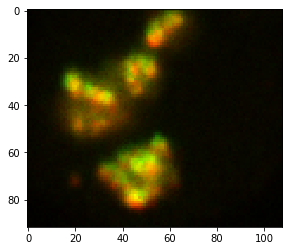

-1,-2,1


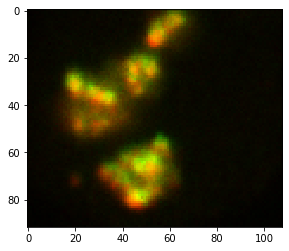

-1,-2,2


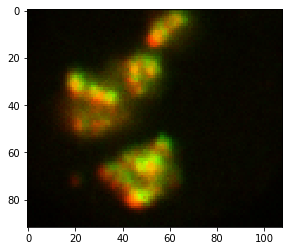

-1,-1,-3


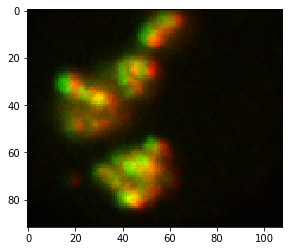

-1,-1,-2


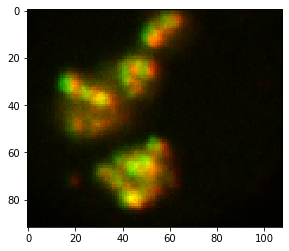

-1,-1,-1


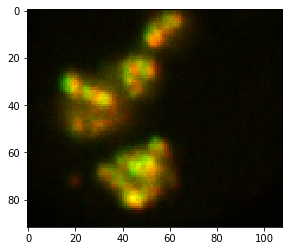

-1,-1,0


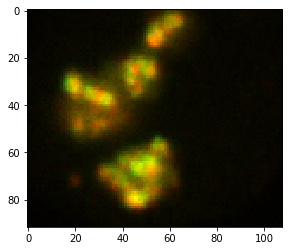

-1,-1,1


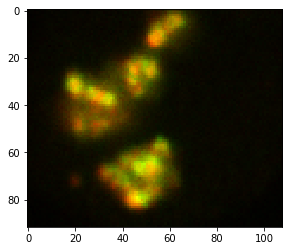

-1,-1,2


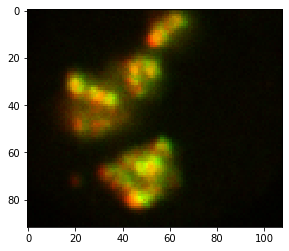

-1,0,-3


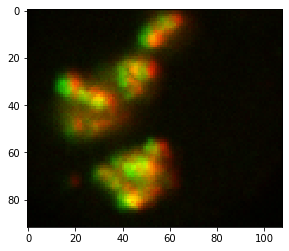

-1,0,-2


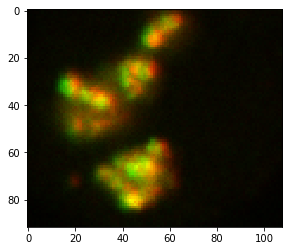

-1,0,-1


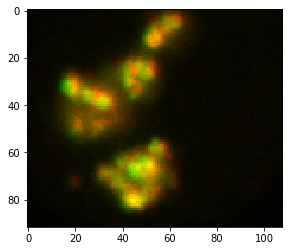

-1,0,0


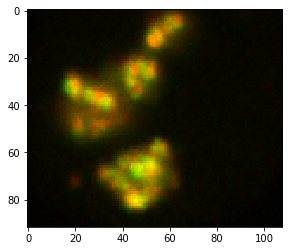

-1,0,1


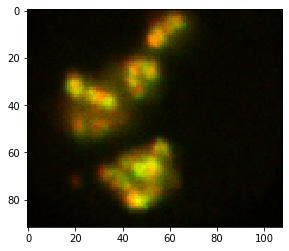

-1,0,2


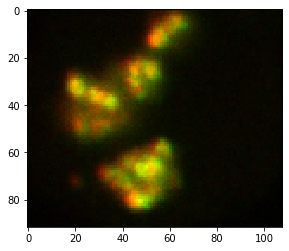

-1,1,-3


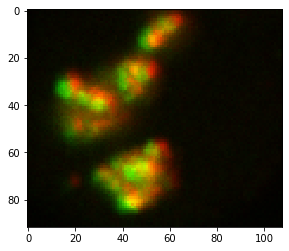

-1,1,-2


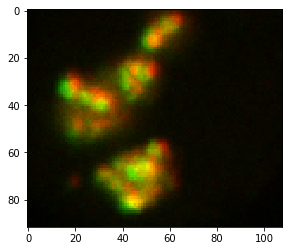

-1,1,-1


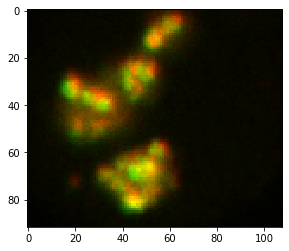

-1,1,0


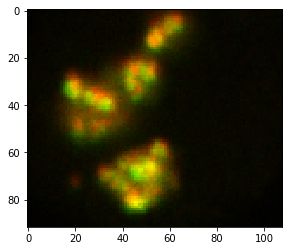

-1,1,1


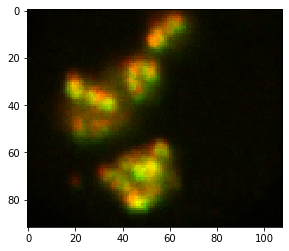

-1,1,2


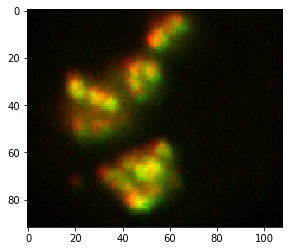

-1,2,-3


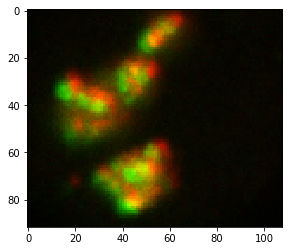

-1,2,-2


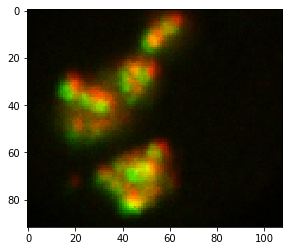

-1,2,-1


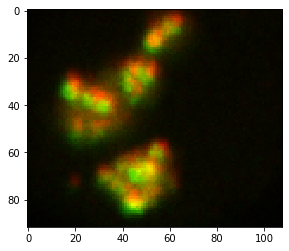

-1,2,0


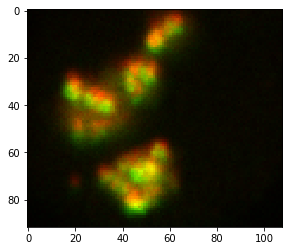

-1,2,1


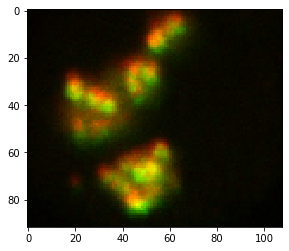

-1,2,2


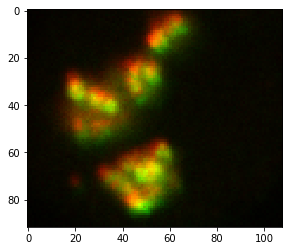

0,-3,-3


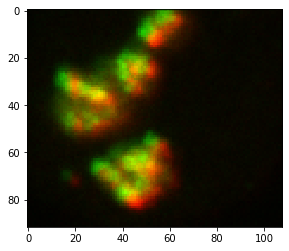

0,-3,-2


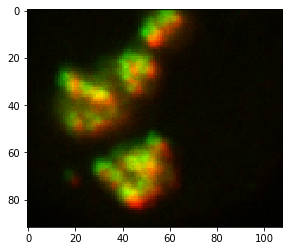

0,-3,-1


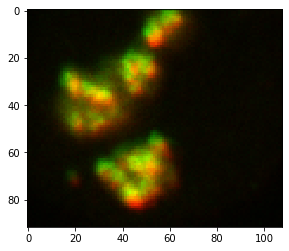

0,-3,0


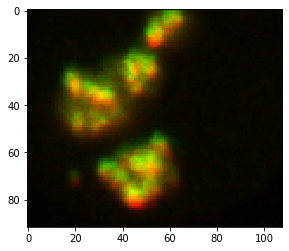

0,-3,1


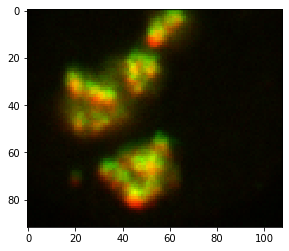

0,-3,2


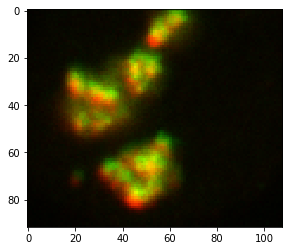

0,-2,-3


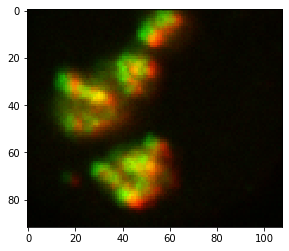

0,-2,-2


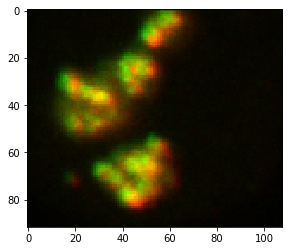

0,-2,-1


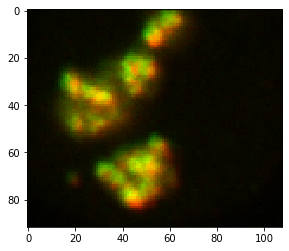

0,-2,0


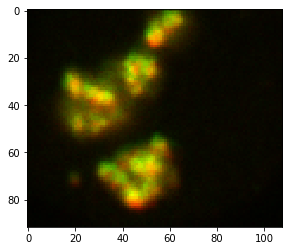

0,-2,1


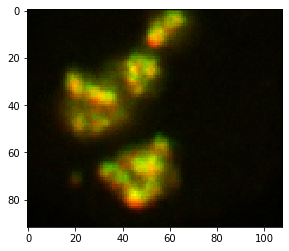

0,-2,2


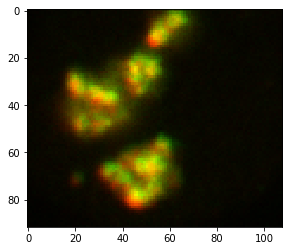

0,-1,-3


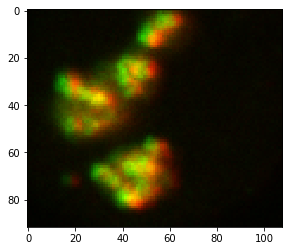

0,-1,-2


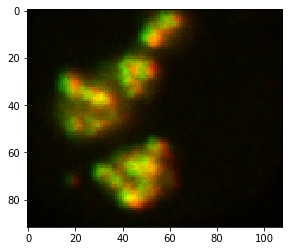

0,-1,-1


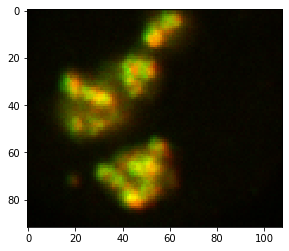

0,-1,0


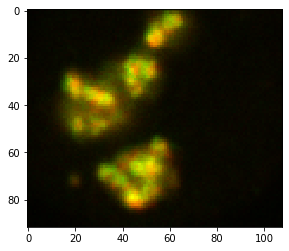

0,-1,1


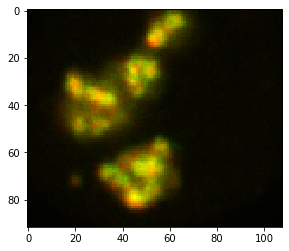

0,-1,2


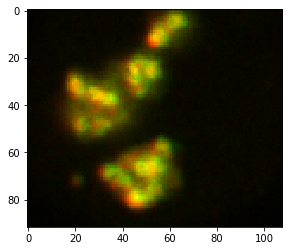

0,0,-3


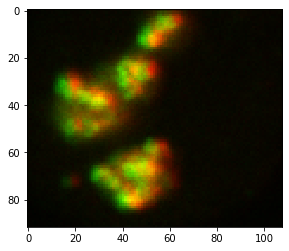

0,0,-2


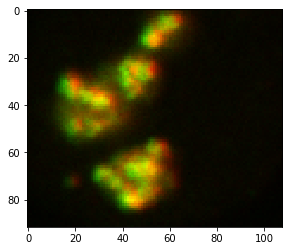

0,0,-1


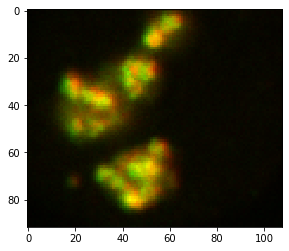

0,0,0


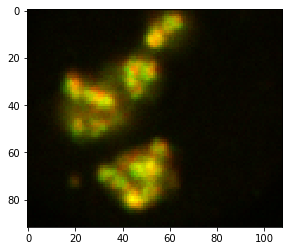

0,0,1


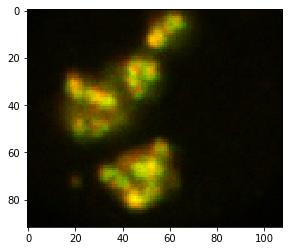

0,0,2


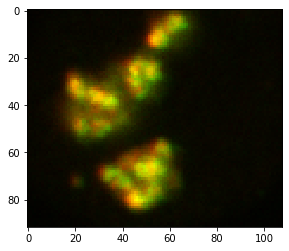

0,1,-3


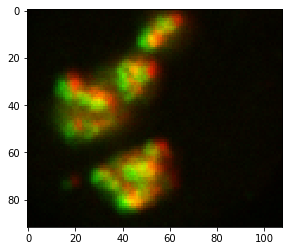

0,1,-2


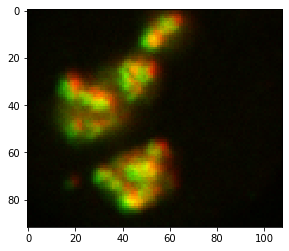

0,1,-1


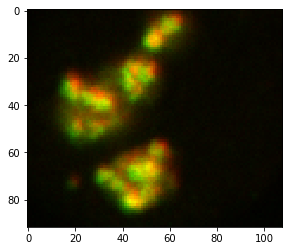

0,1,0


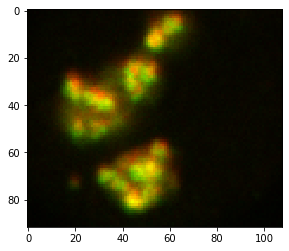

0,1,1


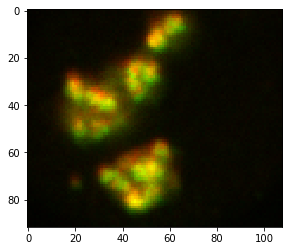

0,1,2


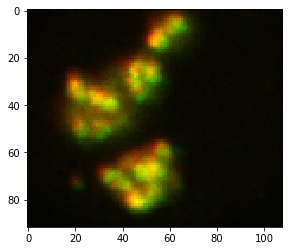

0,2,-3


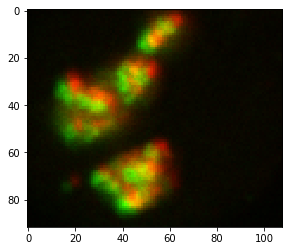

0,2,-2


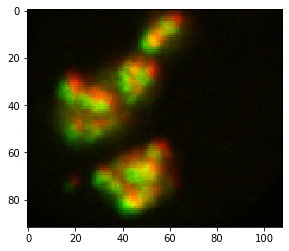

0,2,-1


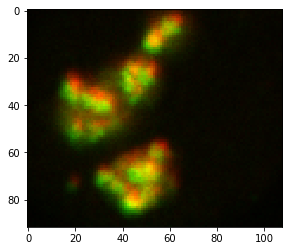

0,2,0


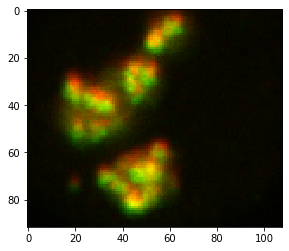

0,2,1


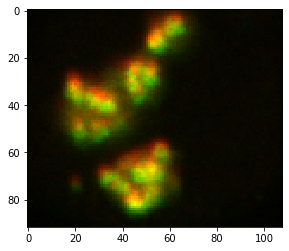

0,2,2


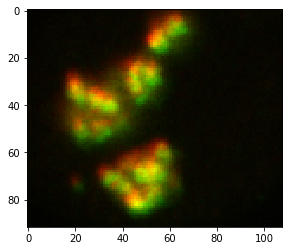

1,-3,-3


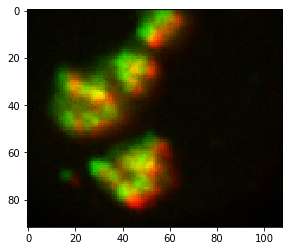

1,-3,-2


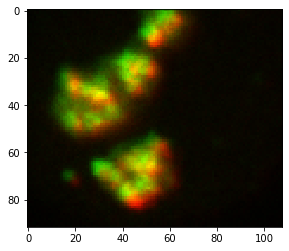

1,-3,-1


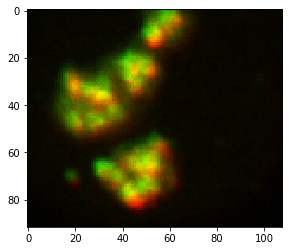

1,-3,0


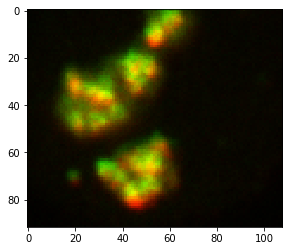

1,-3,1


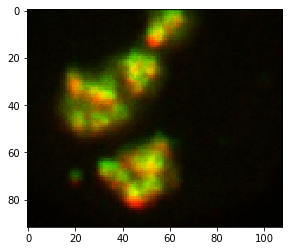

1,-3,2


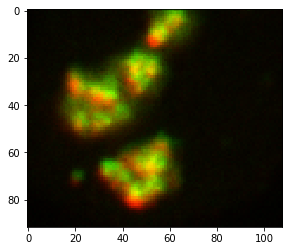

1,-2,-3


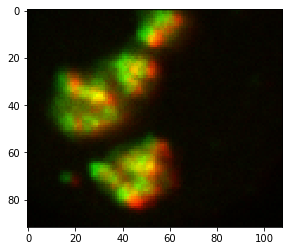

1,-2,-2


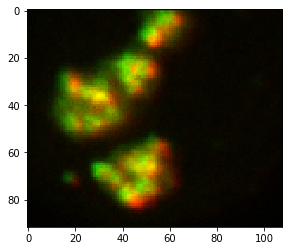

1,-2,-1


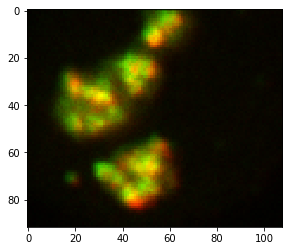

1,-2,0


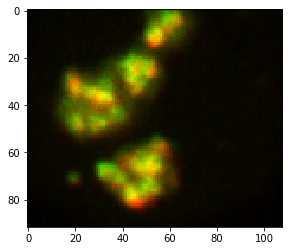

1,-2,1


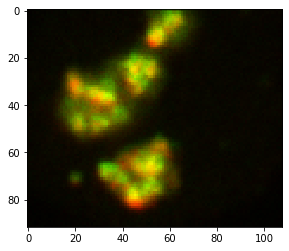

1,-2,2


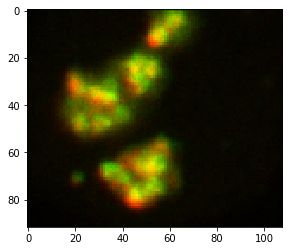

1,-1,-3


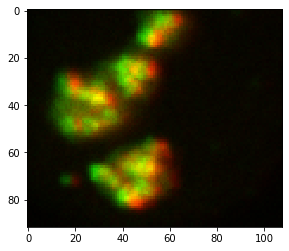

1,-1,-2


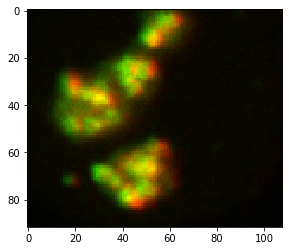

1,-1,-1


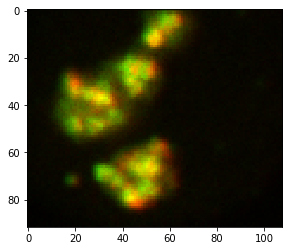

1,-1,0


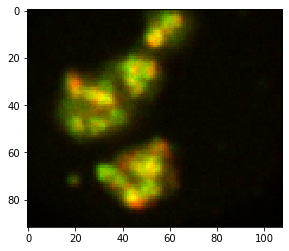

1,-1,1


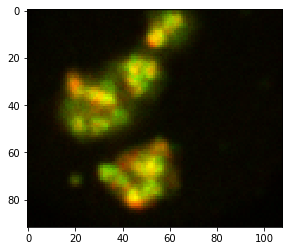

1,-1,2


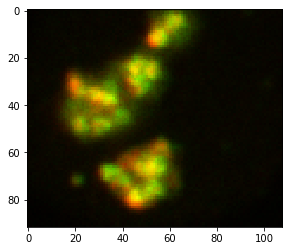

1,0,-3


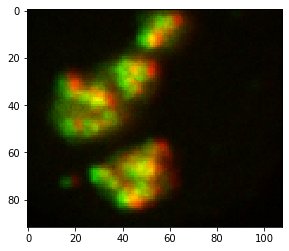

1,0,-2


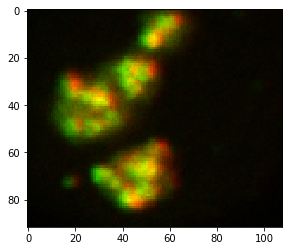

1,0,-1


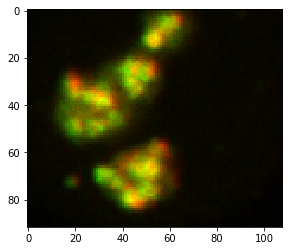

1,0,0


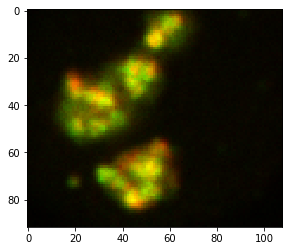

1,0,1


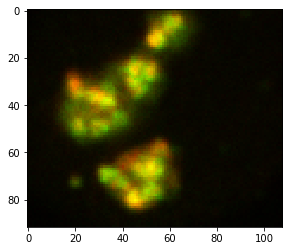

1,0,2


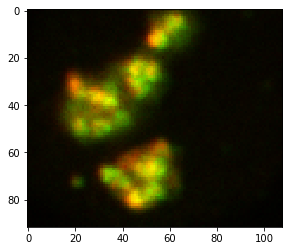

1,1,-3


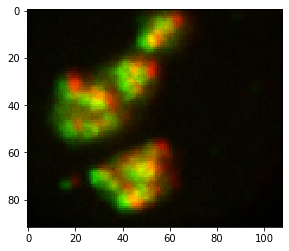

1,1,-2


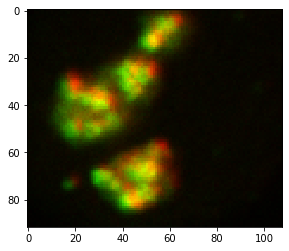

1,1,-1


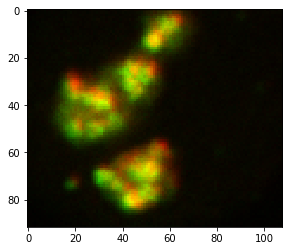

1,1,0


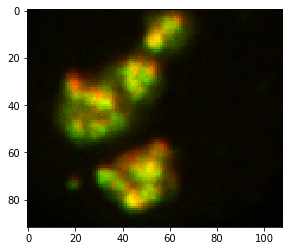

1,1,1


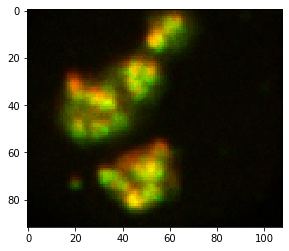

1,1,2


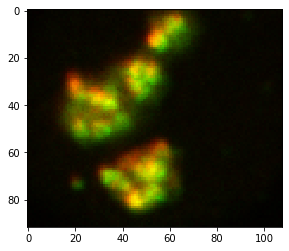

1,2,-3


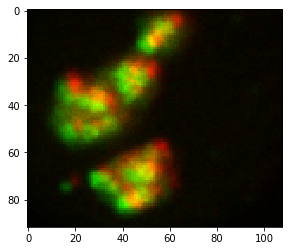

1,2,-2


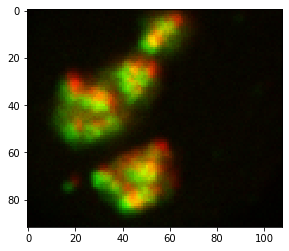

1,2,-1


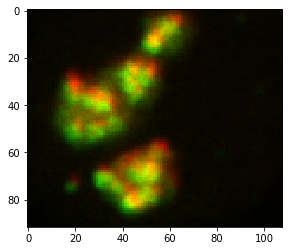

1,2,0


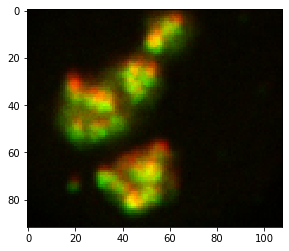

1,2,1


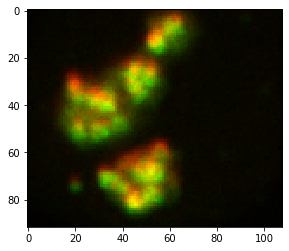

1,2,2


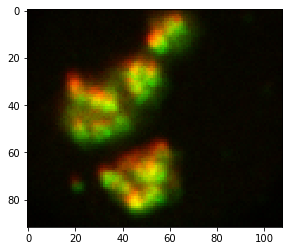

2,-3,-3


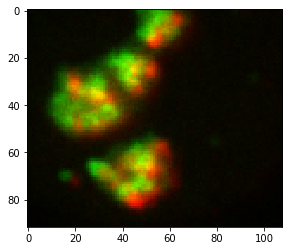

2,-3,-2


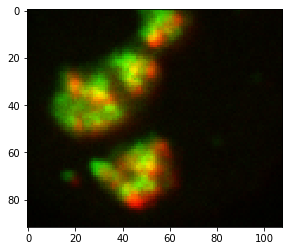

2,-3,-1


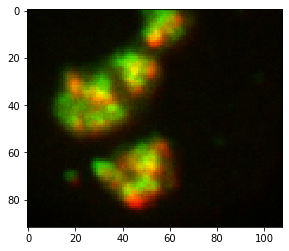

2,-3,0


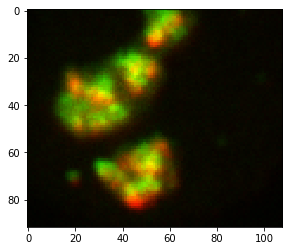

2,-3,1


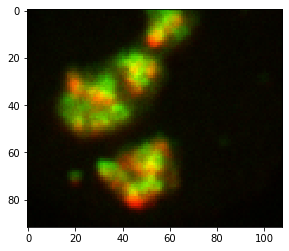

2,-3,2


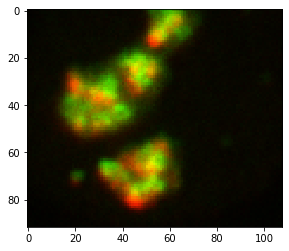

2,-2,-3


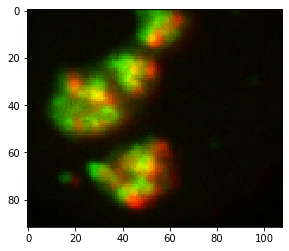

2,-2,-2


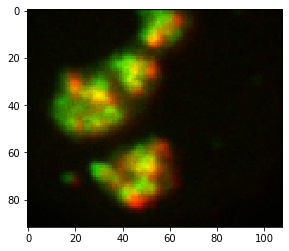

2,-2,-1


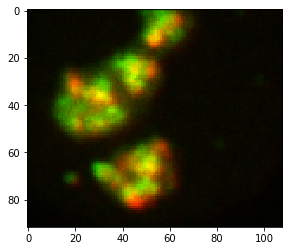

2,-2,0


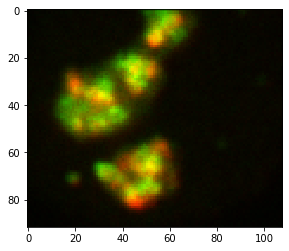

2,-2,1


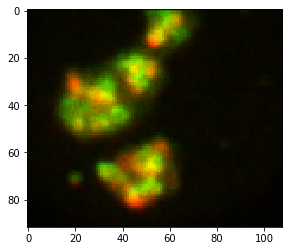

2,-2,2


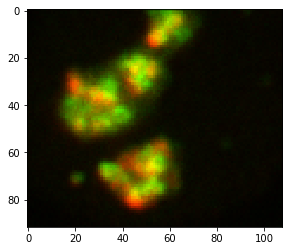

2,-1,-3


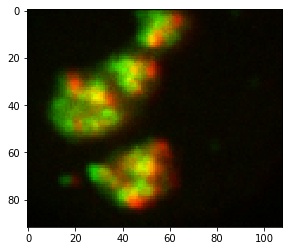

2,-1,-2


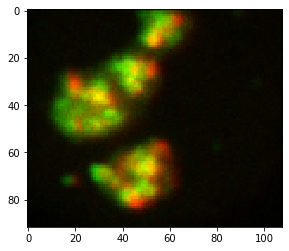

2,-1,-1


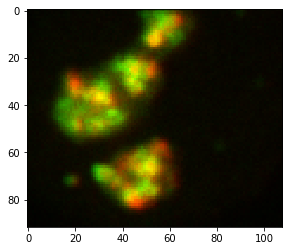

2,-1,0


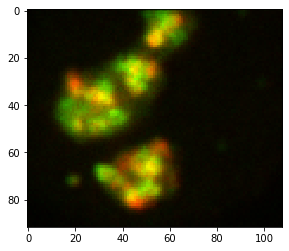

2,-1,1


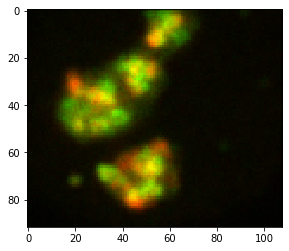

2,-1,2


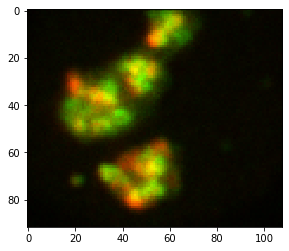

2,0,-3


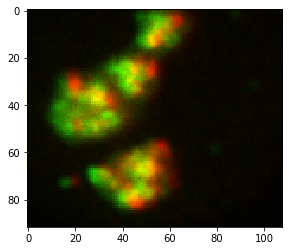

2,0,-2


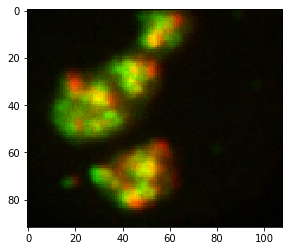

2,0,-1


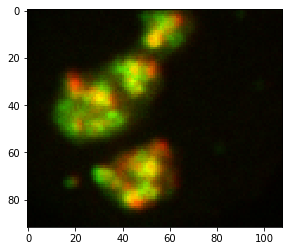

2,0,0


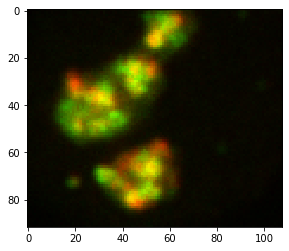

2,0,1


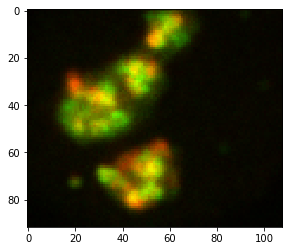

2,0,2


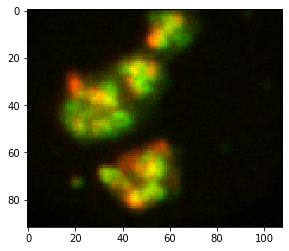

2,1,-3


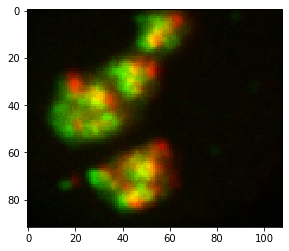

2,1,-2


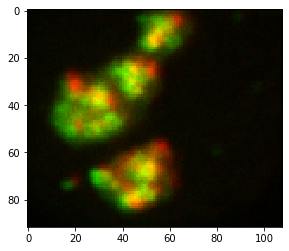

2,1,-1


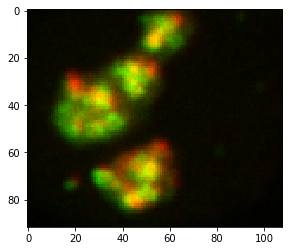

2,1,0


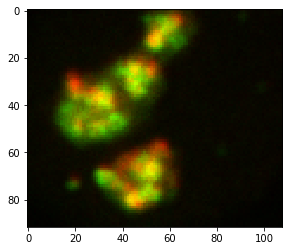

2,1,1


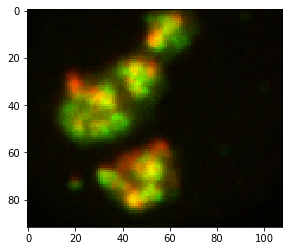

2,1,2


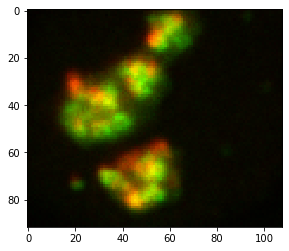

2,2,-3


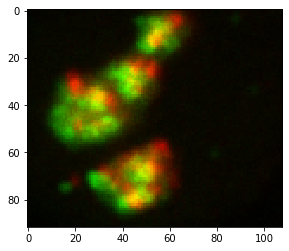

2,2,-2


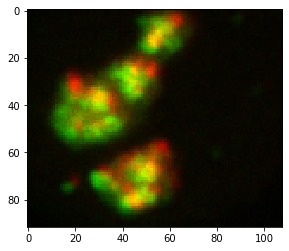

2,2,-1


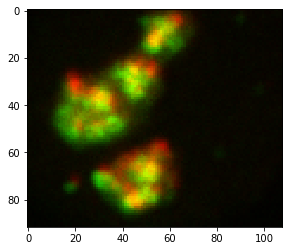

2,2,0


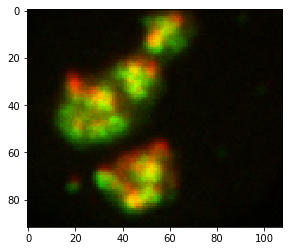

2,2,1


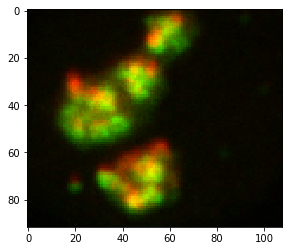

2,2,2


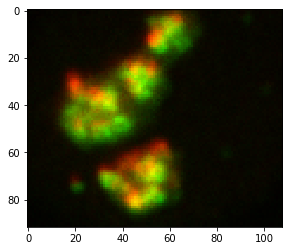

In [4]:
img1p = r"\\allen\aics\assay-dev\users\Frick\PythonProjects\ModalityTransferValidation\Figures\single_cell_data\FBL_20x_100x\FBL_20x_100ximg0cellid1\raw_pred.tif"
img2p = r"\\allen\aics\assay-dev\users\Frick\PythonProjects\ModalityTransferValidation\Figures\single_cell_data\FBL_20x_100x\FBL_20x_100ximg0cellid1\raw_real.tif"
img1 = skio.imread(img1p)
img2 = skio.imread(img2p)
shift_img_dict={}
n=3
shift = list(np.arange(n*-1,n,1))
print(shift)
corrkeep=[]
shiftkeep=[]
for j in shift:
    for k in shift:
        for l in shift:

            shape = np.asarray(img1.shape)        
            center = shape//2
            new_shape = np.asarray([x-abs(y*2) for x,y in zip(shape,[j,k,l])])
            xyz1 = np.asarray([(n,x-n) for x,y,jkl in zip(shape,center,[j,k,l])])
            xyz2 = np.asarray([(n-jkl,x-n-jkl) for x,y,jkl in zip(shape,center,[j,k,l])])
            shift1 = img1[xyz1[0][0]:xyz1[0][1],xyz1[1][0]:xyz1[1][1],xyz1[2][0]:xyz1[2][1]]
            shift2 = img2[xyz2[0][0]:xyz2[0][1],xyz2[1][0]:xyz2[1][1],xyz2[2][0]:xyz2[2][1]]

            rgb = np.zeros(( shift1.shape[1], shift1.shape[2],3))
            for i,im in enumerate([shift1,shift2]):
                rgb[:,:,i] = skex.rescale_intensity(im[im.shape[0]//2,:,:],out_range='uint8')
            corrkeep.append(np.corrcoef(rgb[:,:,0].reshape(-1,),rgb[:,:,1].reshape(-1))[0,1])
            shiftkeep.append((j,k,l))
            plt.imshow(np.uint8(rgb))
            print(','.join([str(x) for x in [j,k,l]]))
            plt.show()


In [6]:
import pandas as pd
df = pd.DataFrame(data = [shiftkeep,corrkeep],index=['shift','corr']).T
corrs = df['corr'].to_numpy()
dfs = df.sort_values('corr')
dfs

shift      corr
180   (2, -3, -3)  0.772842
108   (0, -3, -3)   0.78938
144   (1, -3, -3)  0.790996
210    (2, 2, -3)  0.791901
72   (-1, -3, -3)  0.793518
..            ...       ...
93     (-1, 0, 0)   0.96326
129     (0, 0, 0)  0.967301
123    (0, -1, 0)  0.968705
130     (0, 0, 1)  0.968933
124    (0, -1, 1)   0.97056

[216 rows x 2 columns]

2,-3,-3


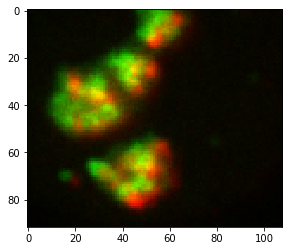

0,0,0


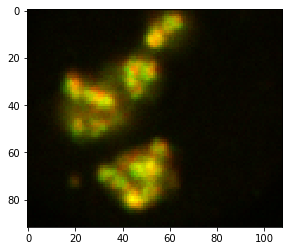

0,-1,1


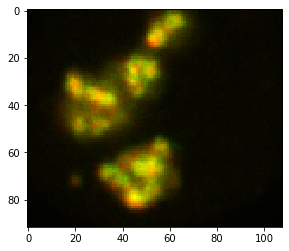

In [9]:
for shifts in [dfs.iloc[0].at['shift'],(0,0,0),dfs.iloc[-1].at['shift']]:
    
    j = shifts[0]
    k = shifts[1]
    l = shifts[2]
    shape = np.asarray(img1.shape)        
    center = shape//2
    new_shape = np.asarray([x-abs(y*2) for x,y in zip(shape,[j,k,l])])
    xyz1 = np.asarray([(n,x-n) for x,y,jkl in zip(shape,center,[j,k,l])])
    xyz2 = np.asarray([(n-jkl,x-n-jkl) for x,y,jkl in zip(shape,center,[j,k,l])])
    shift1 = img1[xyz1[0][0]:xyz1[0][1],xyz1[1][0]:xyz1[1][1],xyz1[2][0]:xyz1[2][1]]
    shift2 = img2[xyz2[0][0]:xyz2[0][1],xyz2[1][0]:xyz2[1][1],xyz2[2][0]:xyz2[2][1]]

    rgb = np.zeros(( shift1.shape[1], shift1.shape[2],3))
    for i,im in enumerate([shift1,shift2]):
        rgb[:,:,i] = skex.rescale_intensity(im[im.shape[0]//2,:,:],out_range='uint8')
    corrkeep.append(np.corrcoef(rgb[:,:,0].reshape(-1,),rgb[:,:,1].reshape(-1))[0,1])
    shiftkeep.append((j,k,l))
    plt.imshow(np.uint8(rgb))
    print(','.join([str(x) for x in [j,k,l]]))
    plt.show()



In [10]:
import napari
%gui qt

In [12]:
for shifts in [dfs.iloc[0].at['shift'],(0,0,0),dfs.iloc[-1].at['shift']]:
    
    j = shifts[0]
    k = shifts[1]
    l = shifts[2]
    shape = np.asarray(img1.shape)        
    center = shape//2
    new_shape = np.asarray([x-abs(y*2) for x,y in zip(shape,[j,k,l])])
    xyz1 = np.asarray([(n,x-n) for x,y,jkl in zip(shape,center,[j,k,l])])
    xyz2 = np.asarray([(n-jkl,x-n-jkl) for x,y,jkl in zip(shape,center,[j,k,l])])
    shift1 = img1[xyz1[0][0]:xyz1[0][1],xyz1[1][0]:xyz1[1][1],xyz1[2][0]:xyz1[2][1]]
    shift2 = img2[xyz2[0][0]:xyz2[0][1],xyz2[1][0]:xyz2[1][1],xyz2[2][0]:xyz2[2][1]]
    viewer=napari.Viewer(title=str(shifts))
    for imgin,name,color in zip([shift1,shift2],['unshifted','shifted'],['green','red']):
        viewer.add_image(imgin,rgb=False,name=name,colormap=color,blending='additive',is_pyramid=False)